# Stock Price Prediction

In [18]:
# importing required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Fetching data from the web using "Alpha Vantage API"

##### How Alpha Vantage API works: 
https://www.alphavantage.co/documentation/

In [19]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=demo'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-02-23', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-02-23': {'1. open': '184.9000', '2. high': '186.4550', '3. low': '184.5700', '4. close': '185.7200', '5. volume': '3433800'}, '2024-02-22': {'1. open': '182.4500', '2. high': '184.5500', '3. low': '181.9300', '4. close': '184.2100', '5. volume': '5078398'}, '2024-02-21': {'1. open': '182.5600', '2. high': '183.0300', '3. low': '178.7500', '4. close': '179.7000', '5. volume': '4728473'}, '2024-02-20': {'1. open': '187.6400', '2. high': '188.7700', '3. low': '183.0600', '4. close': '183.4400', '5. volume': '4247181'}, '2024-02-16': {'1. open': '186.6300', '2. high': '188.9500', '3. low': '185.9452', '4. close': '187.6400', '5. volume': '4842840'}, '2024-02-15': {'1. open': '183.6200', '2. high': '186.9800', '3. low': '183.6200', '4. close': '186.8700', '5. vo

In [20]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [21]:
## Meta data for the related data
data['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2024-02-23',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [22]:
data["Time Series (Daily)"]

{'2024-02-23': {'1. open': '184.9000',
  '2. high': '186.4550',
  '3. low': '184.5700',
  '4. close': '185.7200',
  '5. volume': '3433800'},
 '2024-02-22': {'1. open': '182.4500',
  '2. high': '184.5500',
  '3. low': '181.9300',
  '4. close': '184.2100',
  '5. volume': '5078398'},
 '2024-02-21': {'1. open': '182.5600',
  '2. high': '183.0300',
  '3. low': '178.7500',
  '4. close': '179.7000',
  '5. volume': '4728473'},
 '2024-02-20': {'1. open': '187.6400',
  '2. high': '188.7700',
  '3. low': '183.0600',
  '4. close': '183.4400',
  '5. volume': '4247181'},
 '2024-02-16': {'1. open': '186.6300',
  '2. high': '188.9500',
  '3. low': '185.9452',
  '4. close': '187.6400',
  '5. volume': '4842840'},
 '2024-02-15': {'1. open': '183.6200',
  '2. high': '186.9800',
  '3. low': '183.6200',
  '4. close': '186.8700',
  '5. volume': '4714301'},
 '2024-02-14': {'1. open': '185.0000',
  '2. high': '185.0000',
  '3. low': '182.2600',
  '4. close': '183.5700',
  '5. volume': '3173391'},
 '2024-02-13'

In [23]:
df_raw = pd.DataFrame.from_dict(data['Time Series (Daily)'])
df = df_raw.transpose()

In [24]:
df = df.rename_axis("date").reset_index()

In [25]:
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2024-02-23,184.9000,186.4550,184.5700,185.7200,3433800
1,2024-02-22,182.4500,184.5500,181.9300,184.2100,5078398
2,2024-02-21,182.5600,183.0300,178.7500,179.7000,4728473
3,2024-02-20,187.6400,188.7700,183.0600,183.4400,4247181
4,2024-02-16,186.6300,188.9500,185.9452,187.6400,4842840


In [26]:
new_col = {}
for i in range(len(df.columns)):
    new_col[df.columns[i]] = df.columns[i].split(" ")[-1].capitalize()

df = df.rename(columns=new_col)

In [27]:
df

,Date,Open,High,Low,Close,Volume
0,2024-02-23,184.9000,186.4550,184.5700,185.7200,3433800
1,2024-02-22,182.4500,184.5500,181.9300,184.2100,5078398
2,2024-02-21,182.5600,183.0300,178.7500,179.7000,4728473
3,2024-02-20,187.6400,188.7700,183.0600,183.4400,4247181
4,2024-02-16,186.6300,188.9500,185.9452,187.6400,4842840
...,...,...,...,...,...,...
6112,1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
6113,1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
6114,1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
6115,1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400


In [28]:
print("First 5 records \n",df.head())
print("")
print("Last 5 records \n",df.tail())

First 5 records 
          Date      Open      High       Low     Close   Volume
0  2024-02-23  184.9000  186.4550  184.5700  185.7200  3433800
1  2024-02-22  182.4500  184.5500  181.9300  184.2100  5078398
2  2024-02-21  182.5600  183.0300  178.7500  179.7000  4728473
3  2024-02-20  187.6400  188.7700  183.0600  183.4400  4247181
4  2024-02-16  186.6300  188.9500  185.9452  187.6400  4842840

Last 5 records 
             Date     Open     High      Low    Close    Volume
6112  1999-11-05  92.7500  92.9400  90.1900  90.2500  13737600
6113  1999-11-04  94.4400  94.4400  90.0000  91.5600  16697600
6114  1999-11-03  95.8700  95.9400  93.5000  94.3700  10369100
6115  1999-11-02  96.7500  96.8100  93.6900  94.8100  11105400
6116  1999-11-01  98.5000  98.8100  96.3700  96.7500   9551800


In [29]:
## shape --> (records, fields) / (rows, columns)
df.shape

(6117, 6)

In [30]:
## column Names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [31]:
## Columns/Field datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6117 non-null   object
 1   Open    6117 non-null   object
 2   High    6117 non-null   object
 3   Low     6117 non-null   object
 4   Close   6117 non-null   object
 5   Volume  6117 non-null   object
dtypes: object(6)
memory usage: 286.9+ KB


In [32]:
df['Date'] = pd.to_datetime(df["Date"])

for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6117 non-null   datetime64[ns]
 1   Open    6117 non-null   float64       
 2   High    6117 non-null   float64       
 3   Low     6117 non-null   float64       
 4   Close   6117 non-null   float64       
 5   Volume  6117 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 286.9 KB


In [34]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

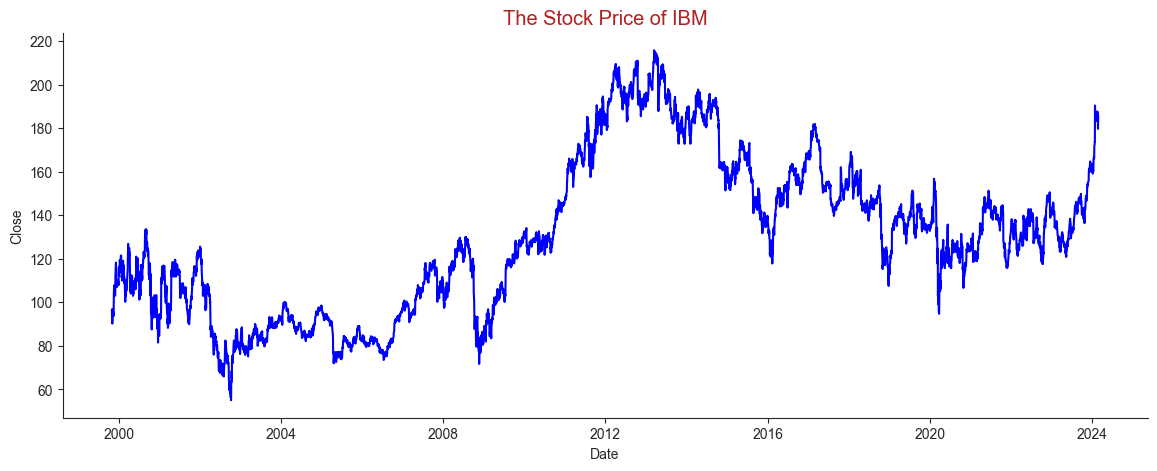

In [35]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
plt.title("The Stock Price of IBM",size='x-large',color='firebrick')
sns.lineplot(data=df,x="Date",y='Close',color='blue')
sns.despine()
plt.title("The Stock Price of IBM",size='x-large',color='firebrick')
plt.show()

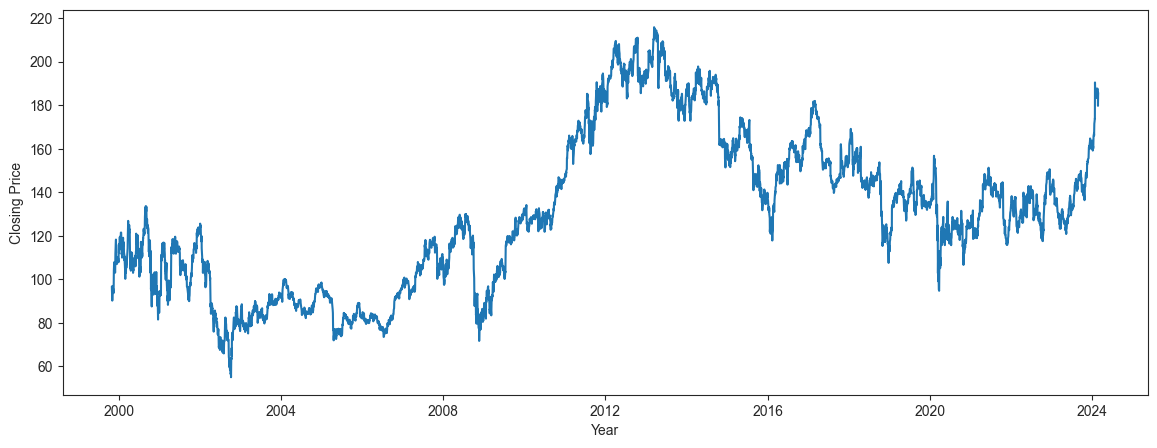

In [36]:
# using Only matplotlib to plot the IBM stock price graph

plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Close"], label="IBM")
plt.ylabel("Closing Price")
plt.xlabel("Year")

# plt.legend(fontsize=12)
plt.show()

In [37]:
## Eporting DataFrame as Pickle file
pd.to_pickle(df,"./IBMstockPrice_demo.pkl")

In [38]:
# Reading Pickle Dataframe
demo_Pickle_df = pd.read_pickle("IBMstockPrice_demo.pkl")

In [39]:
## Exporting DataFrame as CSV file
df[::-1].to_csv("./data/IBMStockPrice.csv", index=False)